In [34]:
import numpy as np
import pandas as pd
import warnings
import itertools

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm 
plt.style.use('fivethirtyeight')

In [36]:
df=pd.read_csv('data.csv')
df.columns=["Date","B","R"]
df = df.drop(columns=["R"])
df.head()

,Date,B
0,1/1/2010,39.45
1,1/2/2010,46.53
2,1/3/2010,37.03
3,1/4/2010,48.44
4,1/5/2010,39.79


In [37]:
df.tail()

,Date,B
1456,12/27/2013,NaN
1457,12/28/2013,NaN
1458,12/29/2013,NaN
1459,12/30/2013,NaN
1460,12/31/2013,NaN


In [38]:
df.shape

(1461, 2)

In [39]:
df['Date']=pd.to_datetime(df['Date'])

In [40]:
df.head()

,Date,B
0,2010-01-01,39.45
1,2010-01-02,46.53
2,2010-01-03,37.03
3,2010-01-04,48.44
4,2010-01-05,39.79


In [41]:
df.set_index('Date', inplace = True)

In [42]:
df.head()

,B
Date,
2010-01-01,39.45
2010-01-02,46.53
2010-01-03,37.03
2010-01-04,48.44
2010-01-05,39.79


In [43]:
df.isnull().sum()

B    269
dtype: int64

In [44]:
df.tail()

,B
Date,
2013-12-27,NaN
2013-12-28,NaN
2013-12-29,NaN
2013-12-30,NaN
2013-12-31,NaN


In [45]:
#df = df.fillna(df.bfill())

In [46]:
df.tail()

,B
Date,
2013-12-27,NaN
2013-12-28,NaN
2013-12-29,NaN
2013-12-30,NaN
2013-12-31,NaN


In [47]:
df = df.dropna()

In [48]:
df.tail()

,B
Date,
2013-11-28,19.05
2013-11-29,22.64
2013-11-30,21.74
2013-12-01,22.87
2013-12-02,30.90


In [49]:
df.isnull().sum()

B    0
dtype: int64

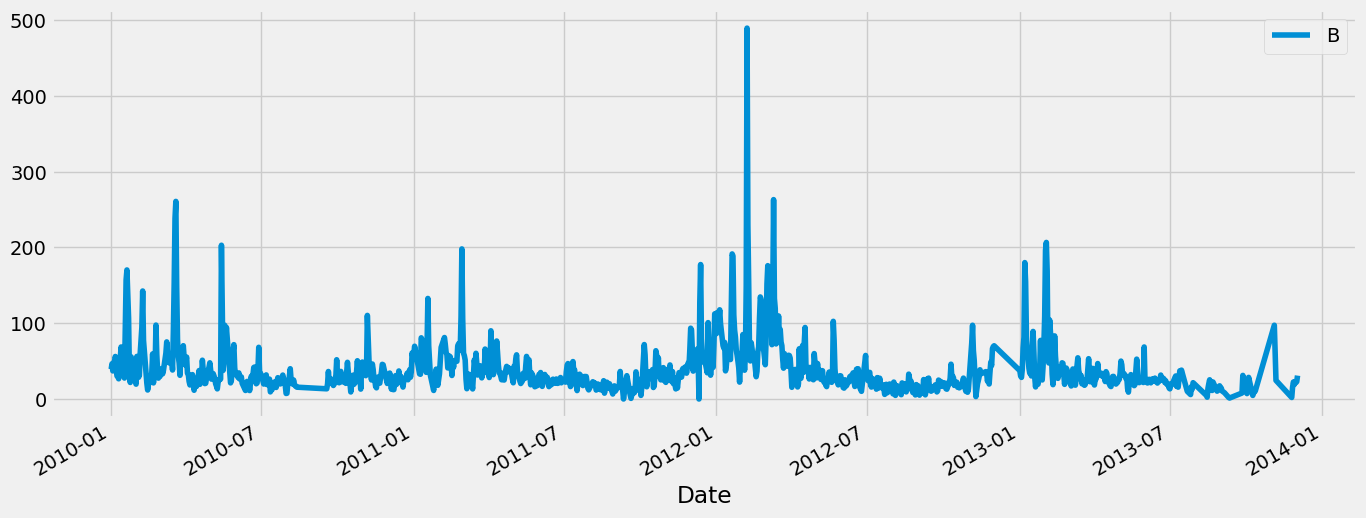

In [50]:
df.plot(figsize=(15, 6))
plt.show()

In [51]:
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 0, 2, 12)
SARIMAX: (0, 0, 2) X (0, 0, 3, 12)
SARIMAX: (0, 0, 2) X (0, 1, 0, 12)


In [52]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [53]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [54]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = model.fit()
            print(f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12735.53651457189
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12225.122764651256
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:11931.685195462593
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:11647.39678391949
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12101.679541494022
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:11451.712182549016
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:11337.39592818104
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:11210.210859572135
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11903.16755947403
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:11565.230843312114
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:11451.125892232187
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:11303.954172063055
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:11653.048560386573
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:11453.566128715636
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:11339.388546926684
ARIMA(0, 0, 0)x(1, 1, 3, 12)12 - AIC:11208.997780945057
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:11564.284354109132
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:11457.265910588

In [55]:
Best_model = sm.tsa.statespace.SARIMAX(df['B'],
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 0),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2053      0.599      0.343      0.732      -0.969       1.380
ar.L2          0.0286      0.469      0.061      0.951      -0.890       0.947
ar.L3         -0.0110      0.170     -0.065      0.949      -0.345       0.323
ma.L1         -0.4302      0.599     -0.718      0.473      -1.605       0.744
ma.L2         -0.3291      0.598     -0.551      0.582      -1.501       0.843
ma.L3         -0.1362      0.156     -0.871      0.384      -0.443       0.170
ar.S.L12      -0.8002      0.212     -3.767      0.000      -1.216      -0.384
ar.S.L24      -0.4492      0.144     -3.115      0.002      -0.732      -0.167
ar.S.L36       0.0035      0.029      0.120      0.904      -0.054       0.061
ma.S.L12      -0.2363      0.274     -0.863      0.388      -0.773       0.300
ma.S.L24      -0.3277      0.222     -1.478      0.1

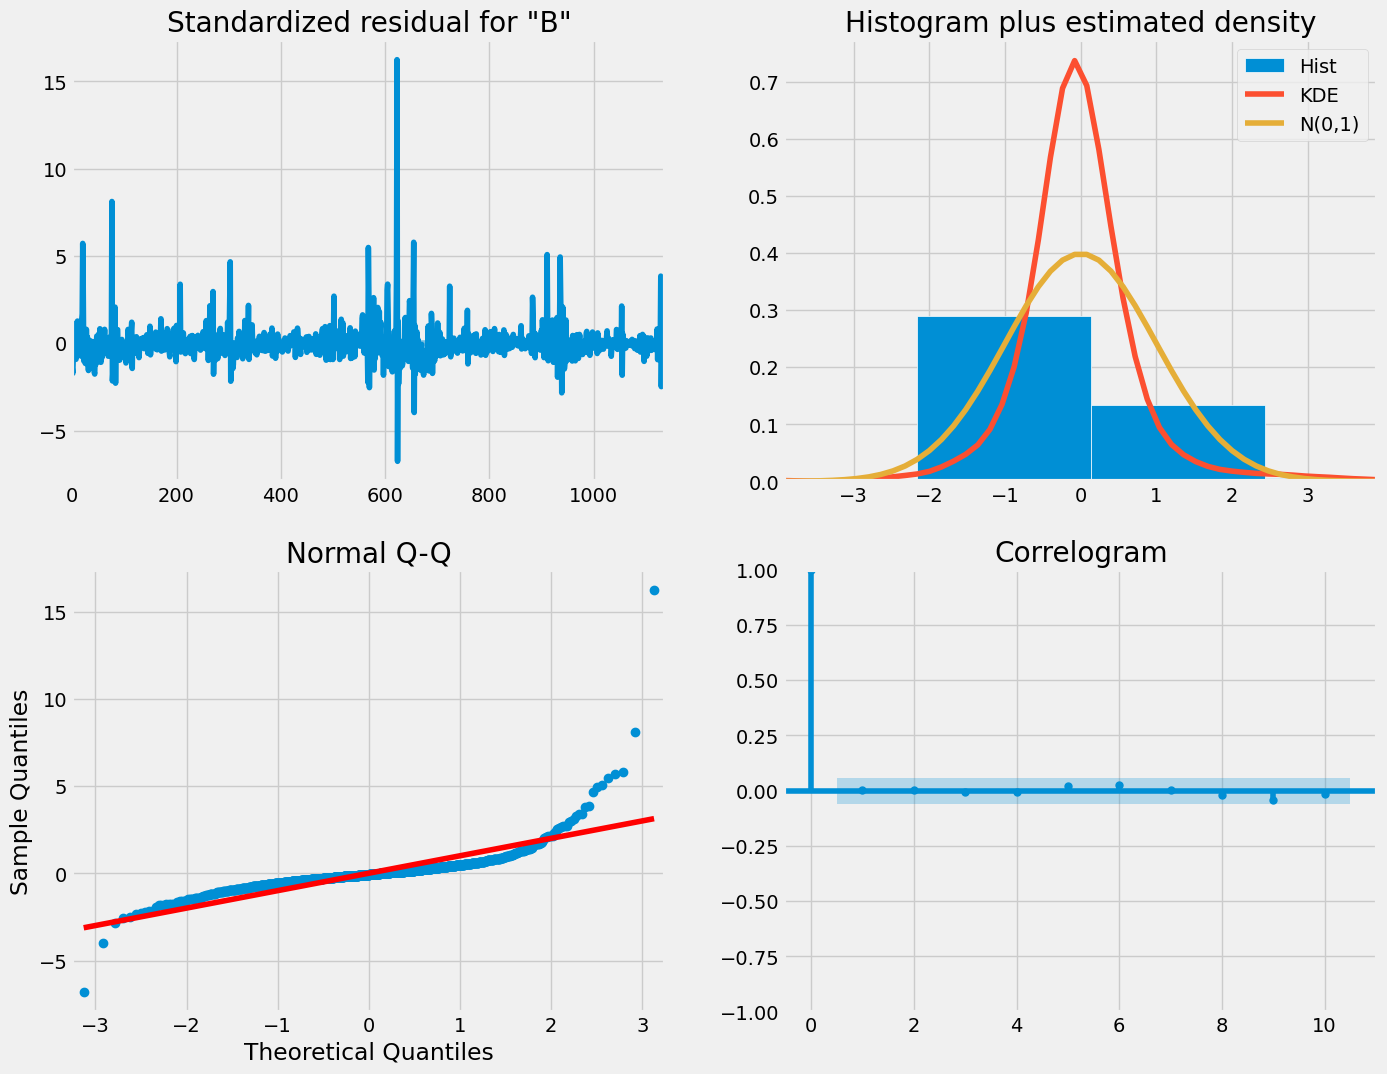

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [57]:
pred = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower B,upper B
Date,,
2013-09-01,-29.956175,56.423971
2013-09-02,-27.994291,58.385705
2013-09-05,-30.254856,56.124971
2013-09-10,-33.092229,53.287495
2013-09-11,-35.663555,50.716066
2013-09-26,-36.738469,49.641066
2013-09-27,-29.950371,56.429090
2013-10-02,-15.323060,71.056350
2013-10-03,-39.502733,46.876622


In [58]:
y_forecasted = pred.predicted_mean
y_truth = df['2013-09-01':]
y_truth['pre_B'] = y_forecasted
y_truth

,B,pre_B
Date,,
2013-09-01,14.37,13.233898
2013-09-02,10.63,15.195707
2013-09-05,8.17,12.935058
2013-09-10,1.95,10.097633
2013-09-11,1.28,7.526255
2013-09-26,7.91,6.451299
2013-09-27,31.18,13.239360
2013-10-02,7.15,27.866645
2013-10-03,13.44,3.686944


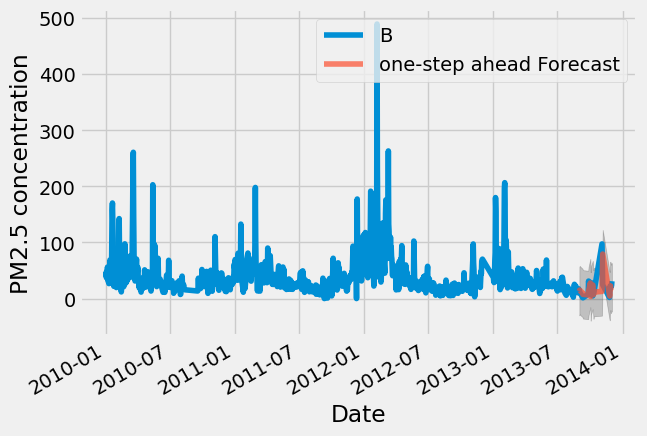

In [59]:
ax = df['2010-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='one-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [60]:
mse = ((y_truth.B - y_truth.pre_B)**2).mean()
print('Mea Squraed Error = ', mse)

Mea Squraed Error =  524.786151884968


In [61]:
rmse = np.sqrt(mse)
print('Root Mean Squraed Error = ', rmse)

Root Mean Squraed Error =  22.908211451027075


In [62]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

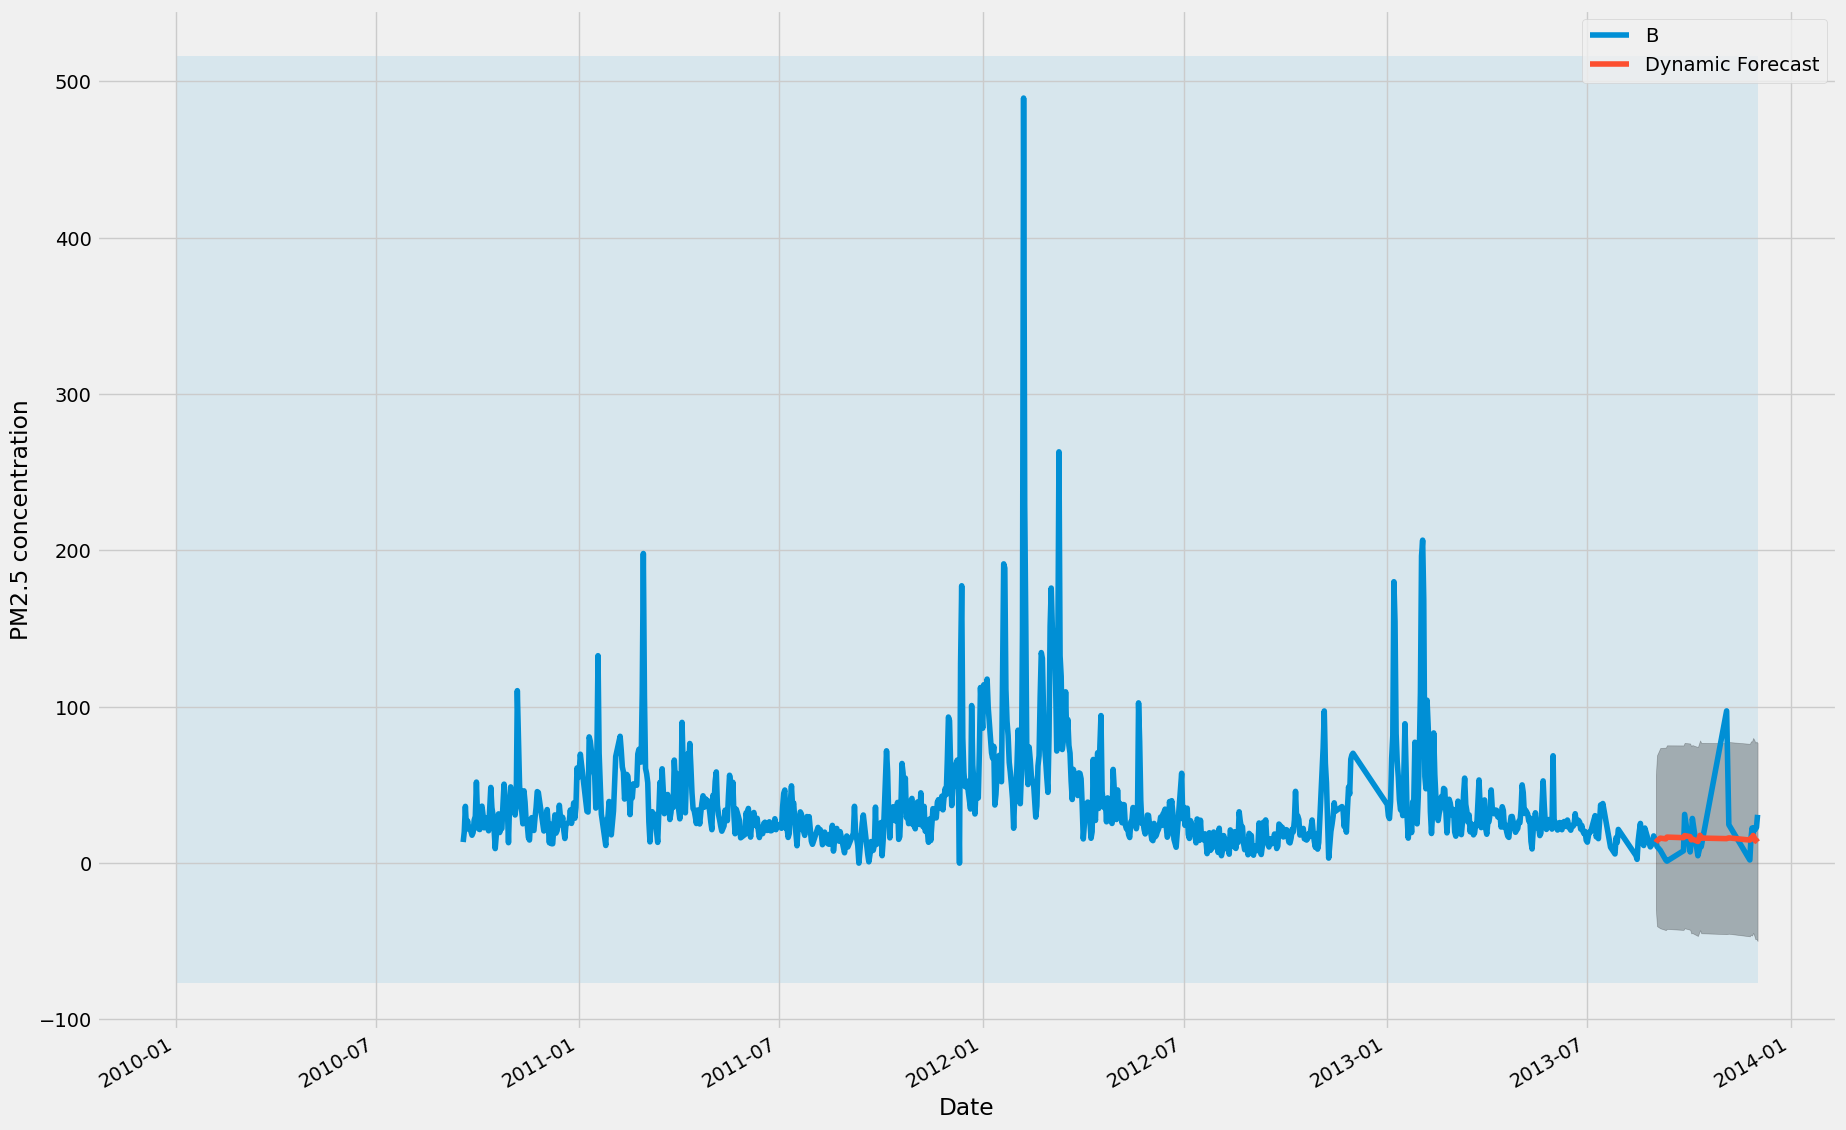

In [63]:
ax = df['2010-09-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-01-01'), df.index[-1],
                alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [64]:
pred_uc = results.get_forecast(steps= 60)

pred_ci = pred_uc.conf_int()

In [65]:
future_df = pd.DataFrame(pred_uc.predicted_mean)
future_df.columns = ['Future_pred']
future_df

,Future_pred
1192,30.471792
1193,24.261291
1194,18.775934
1195,20.093731
1196,19.076067
1197,19.720366
1198,19.992590
1199,22.687318
1200,20.451330
1201,18.667674


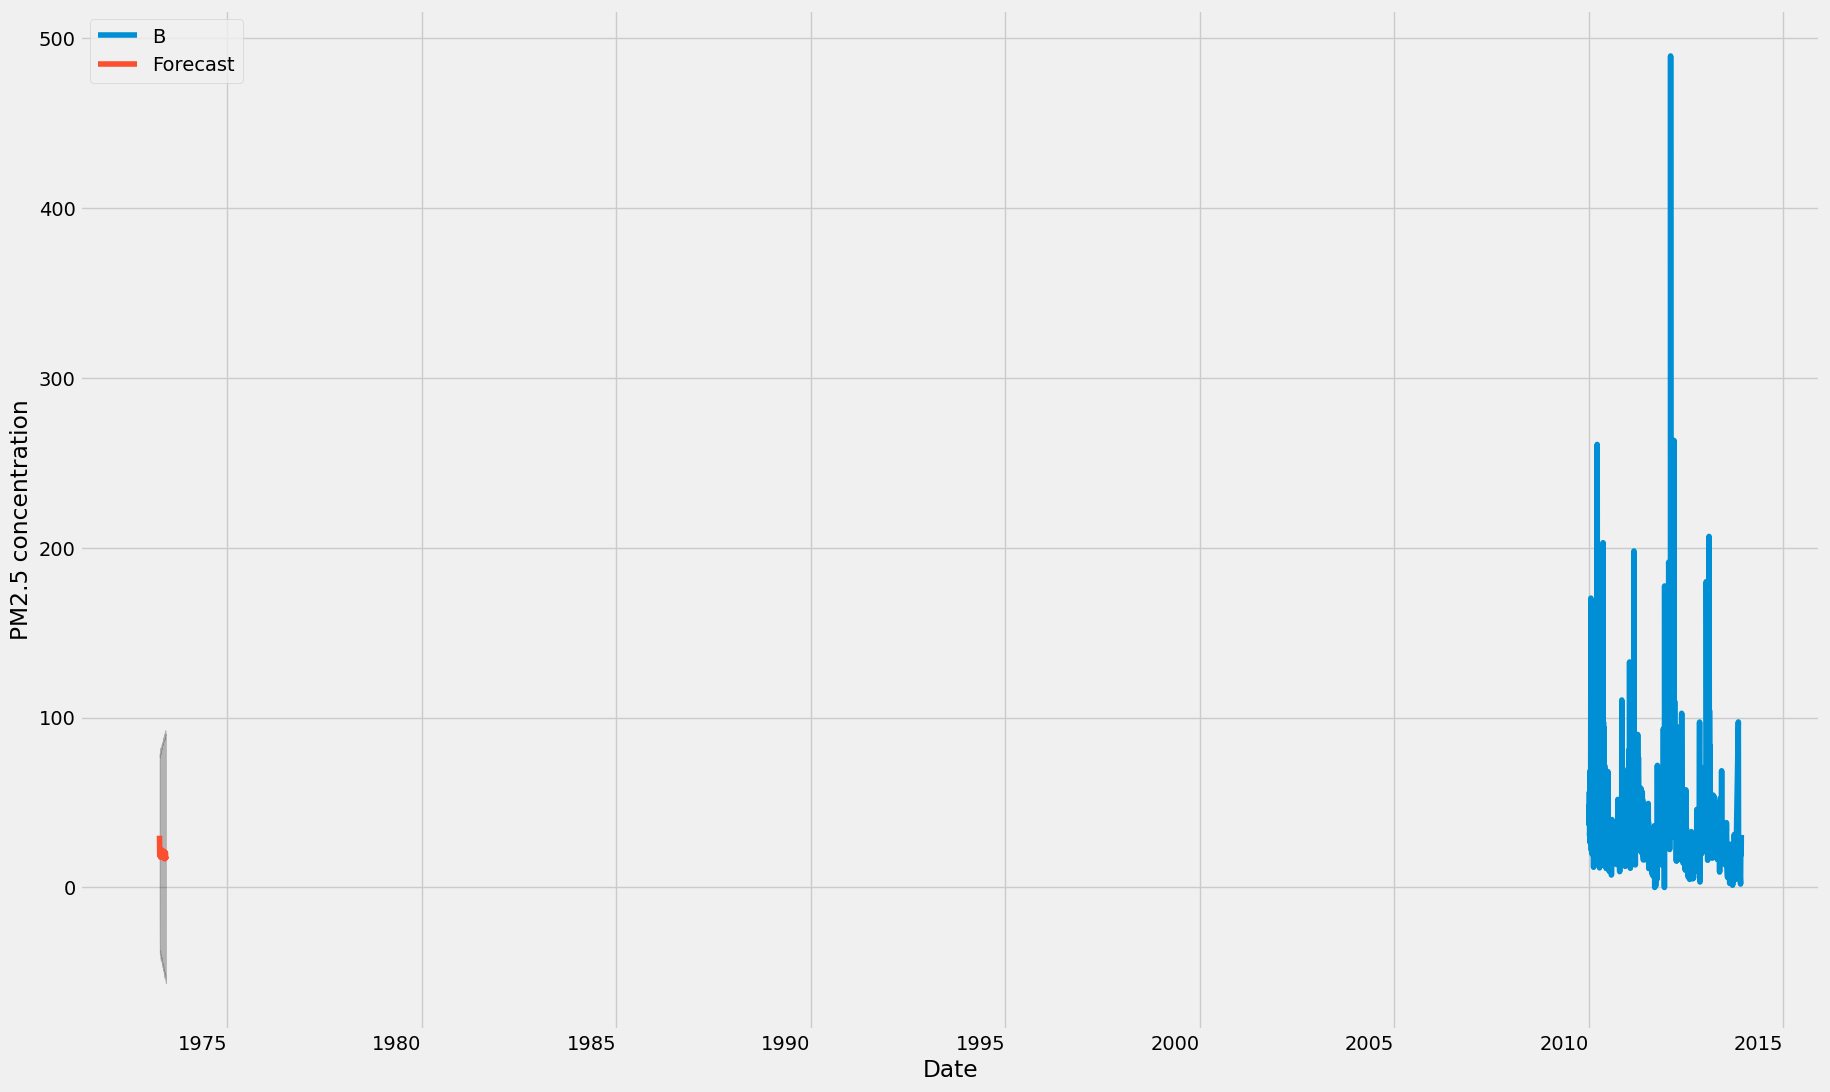

In [66]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()